#User Sentiment before, during, after transformation

Loading the postDataset and comment dataset:

In [1]:
import sys
sys.path.append('/Users/alexsutherland/Dropbox/Insight/WeightLossReddit/')
import redditDataIO
import pandas as pd
import numpy as np
import os
os.chdir('/Users/alexsutherland/Dropbox/Insight/WeightLossReddit/')

In [52]:
commentData = redditDataIO.loadData('userCommentData_Sentiment')
fullWeightLossData = redditDataIO.loadData('combinedSentiment')

In [53]:
commentData

,level_0,index,score,controversiality,body,subreddit,link_title,link_id,created_utc,username,userid,sentimentScores
0,0,0,2,0,Lenny is the man. I'm good friends with his so...,funny,Millionaires In America (Not OC),t3_2u8mg2,1422670000,BrovietUnion1,1,6
1,1,1,11,0,"CondoInternet, brobeans.",technology,SpaceX confirms $1 billion funding round with ...,t3_2t3giy,1421820000,BrovietUnion1,1,0
2,2,2,2,0,"Baller, thanks!! Happy new year!",Seattle,"First New Year's Eve in Seattle, and I have a ...",t3_2qwaqb,1420080000,BrovietUnion1,1,2
3,3,3,1,0,"Awesome, thanks for the advice!",Seattle,"First New Year's Eve in Seattle, and I have a ...",t3_2qwaqb,1420050000,BrovietUnion1,1,2
4,4,4,3,0,Great call! I'm from a place with 0 public tra...,Seattle,"First New Year's Eve in Seattle, and I have a ...",t3_2qwaqb,1420010000,BrovietUnion1,1,2
5,5,5,1,0,That number was from when I was cutting 2-3 lb...,progresspics,"Update [M/24/6'0""]: 1.5 years later, got fat a...",t3_2owbfv,1418380000,BrovietUnion1,1,-1
6,6,6,2,0,Haha well thanks for the ideas. This thread wa...,AskWomen,"I've often wondered: What is your perfect ""fir...",t3_2p0cyo,1418350000,BrovietUnion1,1,6
7,7,7,2,0,Sounds super fun! I'd definitely be down haha ...,AskWomen,"I've often wondered: What is your perfect ""fir...",t3_2p0cyo,1418340000,BrovietUnion1,1,12
8,8,8,2,0,I credit hot broga,progresspics,"Update [M/24/6'0""]: 1.5 years later, got fat a...",t3_2owbfv,1418340000,BrovietUnion1,1,0
9,9,9,1,0,"I like the ""no table separating you"" bit. I ne...",AskWomen,"I've often wondered: What is your perfect ""fir...",t3_2p0cyo,1418330000,BrovietUnion1,1,3


In [57]:
weightLossData = fullWeightLossData[['username','weightChange', 'weightChangeRate','created_utc','timeElapsedEpoch']]
commentData = commentData[['username','subreddit','created_utc','sentimentScores']]

weightLossSubredditData = pd.merge(commentData, weightLossData, how='inner',on='username')
weightLossSubredditData.columns = [u'username', u'subreddit', u'commentDateEpoch', u'sentimentScores', u'weightChange', u'weightChangeRate', u'dietStartDateEpoch', u'timeElapsedEpoch']
weightLossSubredditData

,username,subreddit,commentDateEpoch,sentimentScores,weightChange,weightChangeRate,dietStartDateEpoch,timeElapsedEpoch
0,BrovietUnion1,funny,1422670000,6,-15,-8.035710,1363650000,4838400
1,BrovietUnion1,funny,1422670000,6,-25,-5.357140,1369870000,12096000
2,BrovietUnion1,funny,1422670000,6,-10,-0.548502,1418240000,47256000
3,BrovietUnion1,technology,1421820000,0,-15,-8.035710,1363650000,4838400
4,BrovietUnion1,technology,1421820000,0,-25,-5.357140,1369870000,12096000
5,BrovietUnion1,technology,1421820000,0,-10,-0.548502,1418240000,47256000
6,BrovietUnion1,Seattle,1420080000,2,-15,-8.035710,1363650000,4838400
7,BrovietUnion1,Seattle,1420080000,2,-25,-5.357140,1369870000,12096000
8,BrovietUnion1,Seattle,1420080000,2,-10,-0.548502,1418240000,47256000
9,BrovietUnion1,Seattle,1420050000,2,-15,-8.035710,1363650000,4838400


In [59]:
weightLossSubredditData['beforeDiet'] = weightLossSubredditData['commentDateEpoch'] < weightLossSubredditData['dietStartDateEpoch']
weightLossSubredditData['afterDiet'] = weightLossSubredditData['commentDateEpoch'] > (weightLossSubredditData['dietStartDateEpoch'] + weightLossSubredditData['timeElapsedEpoch'])
weightLossSubredditData['duringDiet'] = weightLossSubredditData.apply(lambda x: 0 if x['beforeDiet'] or x['afterDiet'] else 1, axis=1)
weightLossSubredditData['beforeDiet'] = weightLossSubredditData.apply(lambda x: 1 if x['beforeDiet'] else 0, axis=1)
weightLossSubredditData['afterDiet'] = weightLossSubredditData.apply(lambda x: 1 if x['afterDiet'] else 0, axis=1) 

In [62]:
weightLossSubredditData['dietTime'] = weightLossSubredditData.apply(lambda x: x['beforeDiet']*'before' + x['afterDiet']*'after' + x['duringDiet']*'during', axis=1)

In [63]:
weightLossSubredditData

,username,subreddit,commentDateEpoch,sentimentScores,weightChange,weightChangeRate,dietStartDateEpoch,timeElapsedEpoch,beforeDiet,afterDiet,duringDiet,dietTime
0,BrovietUnion1,funny,1422670000,6,-15,-8.035710,1363650000,4838400,0,1,0,after
1,BrovietUnion1,funny,1422670000,6,-25,-5.357140,1369870000,12096000,0,1,0,after
2,BrovietUnion1,funny,1422670000,6,-10,-0.548502,1418240000,47256000,0,0,1,during
3,BrovietUnion1,technology,1421820000,0,-15,-8.035710,1363650000,4838400,0,1,0,after
4,BrovietUnion1,technology,1421820000,0,-25,-5.357140,1369870000,12096000,0,1,0,after
5,BrovietUnion1,technology,1421820000,0,-10,-0.548502,1418240000,47256000,0,0,1,during
6,BrovietUnion1,Seattle,1420080000,2,-15,-8.035710,1363650000,4838400,0,1,0,after
7,BrovietUnion1,Seattle,1420080000,2,-25,-5.357140,1369870000,12096000,0,1,0,after
8,BrovietUnion1,Seattle,1420080000,2,-10,-0.548502,1418240000,47256000,0,0,1,during
9,BrovietUnion1,Seattle,1420050000,2,-15,-8.035710,1363650000,4838400,0,1,0,after


We now have when the comment was posted, let's bin this based on the diet time:

In [64]:
weightLossSubredditData.groupby(['dietTime','subreddit'])['weightChange'].mean()

dietTime  subreddit       
after     1200isplenty        -37.668561
          1200isplentyketo    -41.000000
          18_19               -29.000000
          1911                -34.000000
          1950s               -51.000000
          1stAnal             -57.000000
          2007scape           -38.507692
          2048                -12.000000
          240sx              -100.000000
          24hoursupport       -80.000000
          250r                -31.000000
          30ROCK              -60.000000
          30daysit            -61.380165
          321                 -14.000000
          350z               -140.000000
...
during    yorkshire      -166.666667
          yorku           -95.000000
          youdontsurf     -60.750000
          youtube         -90.000000
          youtubehaiku    -54.750000
          youtubers      -111.000000
          yugijerk         -9.000000
          yugioh          -13.459459
          yuri           -115.000000
          zelda      

We need to segment the users into large losers and small losers:

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 8,8

def plotDistribution(data, column, binSize = 5):
    plt.hist(data[column].values,bins=np.arange(data[column].min()-5,data[column].max()+5,binSize), facecolor='g', alpha=0.8)
    plt.suptitle('Distribution of ' + column, fontsize=20)
    plt.xlabel(column, fontsize=16)
    plt.ylabel('Count', fontsize=16)

In [66]:
weightLossSubredditData.describe()

,commentDateEpoch,sentimentScores,weightChange,weightChangeRate,dietStartDateEpoch,timeElapsedEpoch,beforeDiet,afterDiet,duringDiet
count,1.228445e+06,1228445.000000,1228445.000000,1228445.000000,1.228445e+06,1.228445e+06,1228445.000000,1228445.000000,1228445.000000
mean,1.395289e+09,0.912938,-55.088537,-6.733726,1.406437e+09,3.323018e+07,0.580971,0.140357,0.278672
std,3.102024e+07,4.349521,37.255926,4.683745,1.710549e+07,3.767161e+07,0.493400,0.347357,0.448346
min,1.156320e+09,-273.000000,-385.000000,-30.000000,1.363650e+09,6.048000e+05,0.000000,0.000000,0.000000
25%,1.377450e+09,0.000000,-72.000000,-9.050280,1.392940e+09,1.170000e+07,0.000000,0.000000,0.000000
50%,1.401880e+09,0.000000,-47.000000,-5.978670,1.407280e+09,2.340000e+07,1.000000,0.000000,0.000000
75%,1.420360e+09,2.000000,-30.000000,-3.291010,1.420860e+09,3.640000e+07,1.000000,0.000000,1.000000
max,1.434830e+09,206.000000,-5.000000,-0.037398,1.434440e+09,5.670720e+08,1.000000,1.000000,1.000000


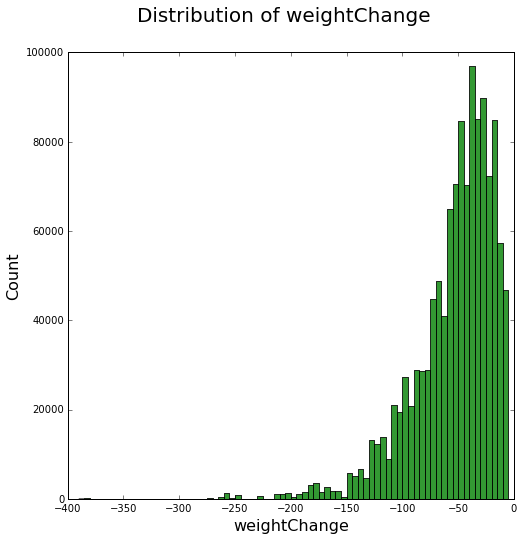

In [67]:

#weightLossSubredditData.describe()
plotDistribution(weightLossSubredditData, column='weightChange')

Let's gate the large and small losers by the 75th and 25th percentile: 

In [111]:
largeLosers = weightLossSubredditData.ix[weightLossSubredditData['weightChange'] < -70,:]
largeLosers

smallLosers = weightLossSubredditData.ix[weightLossSubredditData['weightChange'] > -30,:]
smallLosers

,username,subreddit,commentDateEpoch,sentimentScores,weightChange,weightChangeRate,dietStartDateEpoch,timeElapsedEpoch,beforeDiet,afterDiet,duringDiet,dietTime
0,BrovietUnion1,funny,1422670000,6,-15,-8.035710,1363650000,4838400,0,1,0,after
1,BrovietUnion1,funny,1422670000,6,-25,-5.357140,1369870000,12096000,0,1,0,after
2,BrovietUnion1,funny,1422670000,6,-10,-0.548502,1418240000,47256000,0,0,1,during
3,BrovietUnion1,technology,1421820000,0,-15,-8.035710,1363650000,4838400,0,1,0,after
4,BrovietUnion1,technology,1421820000,0,-25,-5.357140,1369870000,12096000,0,1,0,after
5,BrovietUnion1,technology,1421820000,0,-10,-0.548502,1418240000,47256000,0,0,1,during
6,BrovietUnion1,Seattle,1420080000,2,-15,-8.035710,1363650000,4838400,0,1,0,after
7,BrovietUnion1,Seattle,1420080000,2,-25,-5.357140,1369870000,12096000,0,1,0,after
8,BrovietUnion1,Seattle,1420080000,2,-10,-0.548502,1418240000,47256000,0,0,1,during
9,BrovietUnion1,Seattle,1420050000,2,-15,-8.035710,1363650000,4838400,0,1,0,after


Let's group by the subreddit and dietTime, calculating the mean sentiment score:

In [139]:
#weightLostByTime = pd.DataFrame(largeLosers.groupby(['dietTime'])['sentimentScores'].mean())
largeWeightLostByTime = pd.DataFrame(index=[['after','before','during'],['large','large','large']])
largeWeightLostByTime['count'] = largeLosers.groupby(['dietTime'])['sentimentScores'].count().values
largeWeightLostByTime

,,count
after,large,21877
before,large,176666
during,large,116625


In [140]:
smallWeightLostByTime = pd.DataFrame(index=[['after','before','during'],['small','small','small']])
smallWeightLostByTime['count'] = smallLosers.groupby(['dietTime'])['sentimentScores'].count().values
smallWeightLostByTime

,,count
after,small,66284
before,small,177286
during,small,59534


In [141]:
weightLostByTime = pd.concat([smallWeightLostByTime, largeWeightLostByTime])
weightLostByTime

,,count
after,small,66284
before,small,177286
during,small,59534
after,large,21877
before,large,176666
during,large,116625


In [142]:
#weightLostByTime[''] = smallLosers.groupby(['dietTime'])['sentimentScores'].mean()
#weightLostByTime['largeCount'] = largeLosers.groupby(['dietTime'])['weightChange'].count()
#weightLostByTime['smallCount'] = smallLosers.groupby(['dietTime'])['weightChange'].count()
#weightLostByTime.columns = ['largeSentiment','smallSentiment','largeCount','smallCount']

In [161]:
weightLostByTimeUnstack = weightLostByTime.reset_index()
weightLostByTimeUnstack.columns = ['dietTime','weightLossAmount','count']
weightLostByTimeUnstack

,dietTime,weightLossAmount,count
0,after,small,66284
1,before,small,177286
2,during,small,59534
3,after,large,21877
4,before,large,176666
5,during,large,116625


In [134]:
largeLosers.shape

(315168, 12)

In [135]:
smallLosers.shape

(303104, 12)

Let's plot this:

In [152]:
weightLostByTimeUnstack = weightLostByTimeUnstack.reindex([1,2,0,4,5,3])
weightLostByTimeUnstack

,dietTime,weightLoss,sentimentScore
1,before,small,177286
2,during,small,59534
0,after,small,66284
4,before,large,176666
5,during,large,116625
3,after,large,21877


In [155]:
weightLostByTimeUnstack2 = weightLostByTimeUnstack.copy()
weightLostByTimeUnstack2.index= [0,1,2,3,4,5]

,dietTime,weightLoss,sentimentScore
0,before,small,177286
1,during,small,59534
2,after,small,66284
3,before,large,176666
4,during,large,116625
5,after,large,21877


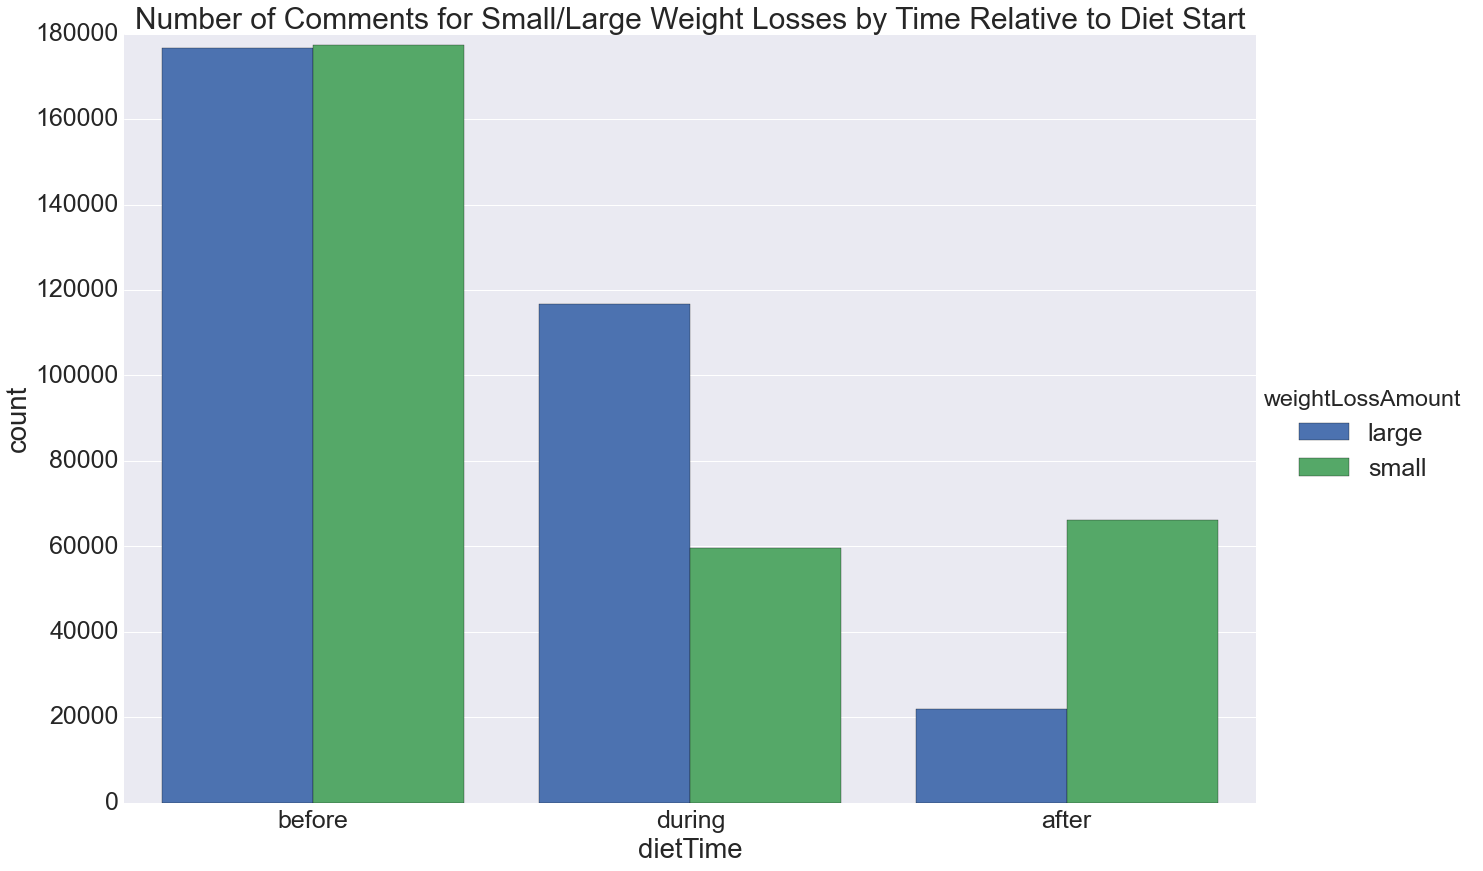

In [179]:
import seaborn as sns


sns.factorplot("dietTime", "count", "weightLossAmount", weightLostByTimeUnstack, kind="bar", x_order=['before','during','after'], size=12, aspect=1.5)
sns.set_context("notebook", font_scale=2.5, rc={"lines.linewidth": 2.5})
plt.gca().set_title('Number of Comments for Small/Large Weight Losses by Time Relative to Diet Start')
#sns.barplot(x=np.array([3,1,2]),y=[weightLostByTime['smallCount'].values, weightLostByTime['largeCount'].values])